In [158]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Machine Learning (introduction)

- AI and Machine learning
- Features and Labels
- Error estimation (loss and cost)
- Generalization (population and sample)
- Approaches: supervised learning, unsupervised learning, self-supervised leatrning, dimensionality reduction, reinforecement learning
- Representation learning and deep models
- Learning types: regression, classification, clustering, etc. 

## Never ever forget !!!

- Parametrized models
<br>
Machine learning models (more than 90%) are parametrized functions
$$
f: X \to Y
$$
with parameters $\mathcal{W} = (W^1, W^2, \dots, W^L)$ and $\mathcal{b} = (b^1, b^2, \dots, b^L)$
<br>
We can consider this models as:
$$
f: \mathcal{W} \times \mathcal{b} \times X \to Y
$$
<br>
- Data sample (training / validation / test set) from population:
Then we have sample of our data 
$$
X = (X^1, X^2, \dots, X^m)
$$ 
from entire population along with labels $Y = (y^1, y^2, \dots, y^m)$ and we train on this data
- Training process:
Define loss function:
$$
L(f(x), y)
$$
where $y$ adre labels
<br>
We fix our data sample as constants $X = (X^1, X^2, \dots, X^m)$, define cost function as aggregation of loss functions over our data sample:
$$
C : \mathcal{W} \to \mathbb{R}^1
$$
such that:
$$
C(W, b) = \text{aggr}_{i=1}^m(L(f(X^i, W, b,  y)))
$$
For instance aggregate with mean:
$$
C(W, b) = \frac{1}{m}\sum_{i=1}^m(L(f(X^i, W, b, y)))
$$
<br>
- Training:
$$
\min_{W \in \mathcal{W}, b\in \mathcal{b}}C(W, b)
$$
Make the cost $C$ as small as possible for $W$ and $b$, or find $W$ and $b$ for which $C$ is as small as possible



## Example - linear model

Consider linear function $f:\mathbb{R}^1 \to \mathbb{R}^1$:
$$
f(x) = W \cdot x + b
$$
lets consider we have data:
$$
X = (5, 15, 25, 35, 45, 55)
$$
and
$$
y = (5, 20, 14, 32, 22, 38)
$$
<br>
We can create a loss function:
$$
L(W, b, x, y) = ||f(W, x) - y||^2 
$$
and cost:
$$
C(W, b) = \frac{1}{m}\sum_{i=1}^{m}||f(W, x^i) - y^i||^2 = \frac{1}{m}\sum_{i=1}^{m}|f(W, x^i) - y^i|
$$
or
$$
C(W, b) = \frac{1}{m}\sum_{i=1}^{m}||f(W, b, x^i) - y^i||^2 = \frac{1}{m}\sum_{i=1}^{m}|f(W, b, x^i) - y^i|
$$

In [159]:
! pip install -U numpy
! pip install -U matplotlib

In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
X = np.array([5, 15, 25, 35, 45, 55], dtype=float)
y = np.array([5, 20, 14, 32, 22, 38], dtype=float)

In [163]:
def plot_data(y_pr=None):
    plt.subplots(figsize=(15, 5))
    if y_pr is not None:
        plt.plot(y_preds)
    plt.plot(y, 'bo')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    plt.close()

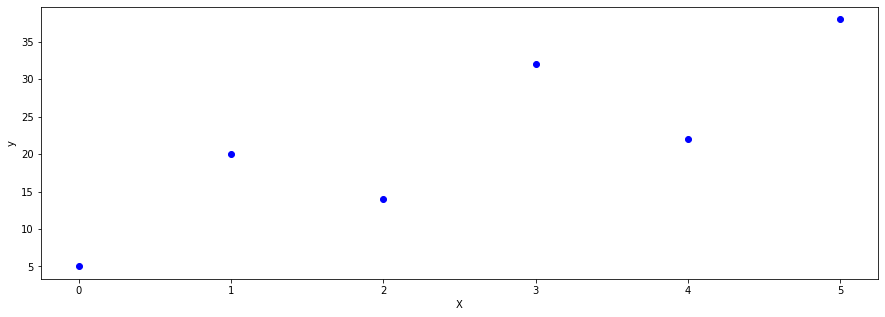

In [164]:
plot_data()

In order to achieve minimum, we need to implement gradient descent:
$$
\frac{\partial f(W, b)}{\partial W} = \frac{1}{m}\sum_{i=1}^{m}2 \cdot x^i \cdot (y^i - (W \cdot x^i + b)) = \frac{2}{m}\sum_{i=1}^{m} x^i \cdot (y^i - (W \cdot x^i + b)) = \frac{2}{m}\sum_{i=1}^{m} (x^i \cdot y^i - W \cdot (x^i)^2 - x^i \cdot b)
$$
and
$$
\frac{\partial C(W, b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}2 \cdot (y^i - (W \cdot x^i + b)) = \frac{2}{m}\sum_{i=1}^{m} (y^i - (W \cdot x^i + b)) = \frac{2}{m}\sum_{i=1}^{m} (y^i - W \cdot x^i - b)
$$
and step by step descend to the exremum point:
$$
W = W - \alpha \cdot \frac{\partial C(y,x,w)}{\partial W}
$$
and
$$
b = b - \alpha \cdot \frac{\partial C(y,x,w)}{\partial b}
$$
<br>
Where $\alpha$ is the step and is called **learning rate** for training

In [189]:
class Linear(object):
    """Linear regression model"""
    
    def __init__(self, W:float, b:float):
        self.W = W
        self.b = b
        self.dl_W = None
        self.dl_b = None
        
    def forward(self, X:np.ndarray) -> np.ndarray:
        return self.W * X + self.b
    
    def cost(self, X:np.ndarray, y:np.ndarray):
        y_pred = self.forward(X)
        cs = (1.0 / len(y)) * np.sum((y - y_pred)**2)
    
        return cs
    
    def gradient(self, X:np.ndarray, y:np.ndarray):
        y_pred = self.forward(X)
        error = y - y_pred
        coef = -(2.0 / len(X))
        self.dl_W = coef * np.sum(X * error)
        self.dl_b = coef * np.sum(error)
    
        return self.dl_W, self.dl_b
    
    def update(self, lr:float):
        self.W = self.W - (lr * self.dl_W)
        self.b = self.b - (lr * self.dl_b)
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
    

In [177]:
# model = Linear(2.0, 1.0) 
# x_demo = np.array([1, 2])
# model(x_demo) == model.W*x_demo + model.b, model.W, model.b
model = Linear(0.0, 0.0)
model.W, model.b

(0.0, 0.0, array([0., 0.]))

Broiadcasting in NumPy arrays which means for array: 
<br>
```python
X = np.array([5, 15, 25, 35, 45, 55])
W*X = np.array([W*5, W*15, W*25, W*35, W*45, W*55])
``` 
Standard vector scalar multiplication

In [181]:
model_test = Linear(2.0, 1.0)
X, X.shape[0], model_test.W * X, X * model_test.W, model_test.W * X + model_test.b, model_test(X)

(array([ 5., 15., 25., 35., 45., 55.]),
 6,
 array([ 10.,  30.,  50.,  70.,  90., 110.]),
 array([ 10.,  30.,  50.,  70.,  90., 110.]),
 array([ 11.,  31.,  51.,  71.,  91., 111.]),
 array([ 11.,  31.,  51.,  71.,  91., 111.]))

In [134]:
def cost(W:float, X:np.ndarray, b:float, y:float):
    y_pred = f(X, W, b)
    cs = (1.0 / X.shape[0]) * np.sum((y - y_pred)**2)
    
    return cs

def der_cost_w_b(W:float, X:np.ndarray, b:float, y:float) -> float:
    y_pred = f(X, W, b)
    error = y - y_pred
    coef = -(2.0 / X.shape[0])
    dl_W = coef * np.sum(X * error)
    dl_b = coef * np.sum(error)
    
    return dl_W, dl_b

In [198]:
class LinearRegression(object):
    """Linear regression model"""
    
    def __init__(self, model: callable, lr:float=0.001, n_iters:int=10, tl:int=10):
        self.model = model
        self.lr = lr
        self.n_iters = n_iters
        self.tl = tl

    def fit(self, X, y):
        for i in range(self.n_iters):
            c = self.model.cost(X, y)
            d_W, d_b = self.model.gradient(X, y)
            self.model.update(self.lr)
            if i % self.tl == 0:
                print(f'Interation {i} cost = {c}')
        self.y_preds = self.model(X)
        print(f'{W=} {b=}')

        return self.y_preds

In [199]:

model = Linear(0.0, 0.0)
linear_regression = LinearRegression(model, lr=0.0001, n_iters=200000, tl=10000)
y_preds = linear_regression.fit(X, y)

Interation 0 cost = 595.5
Interation 10000 cost = 36.657498872059136
Interation 20000 cost = 34.846404149987364
Interation 30000 cost = 34.16560858767596
Interation 40000 cost = 33.90969563513161
Interation 50000 cost = 33.81349724180245
Interation 60000 cost = 33.77733599717962
Interation 70000 cost = 33.76374288436952
Interation 80000 cost = 33.758633195314424
Interation 90000 cost = 33.75671244893318
Interation 100000 cost = 33.75599043500606
Interation 110000 cost = 33.755719027955124
Interation 120000 cost = 33.75561700528694
Interation 130000 cost = 33.755578654681145
Interation 140000 cost = 33.75556423858136
Interation 150000 cost = 33.755558819529185
Interation 160000 cost = 33.75555678249235
Interation 170000 cost = 33.755556016764515
Interation 180000 cost = 33.75555572892529
Interation 190000 cost = 33.755555620725715
W=10.913399553681357 b=-2.055988493893648


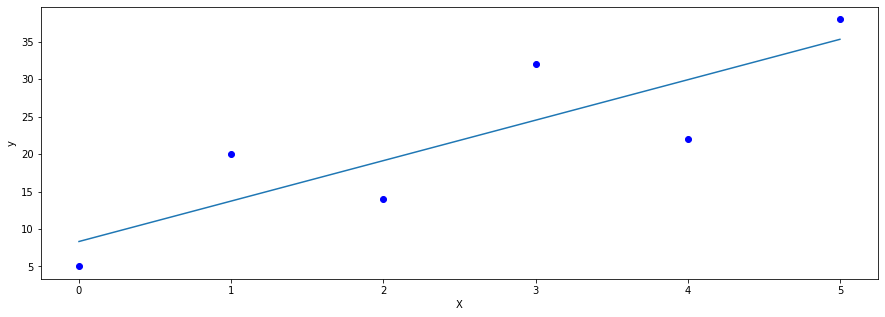

In [200]:
plot_data(y_pr=y_preds)

## Other data

In [202]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)

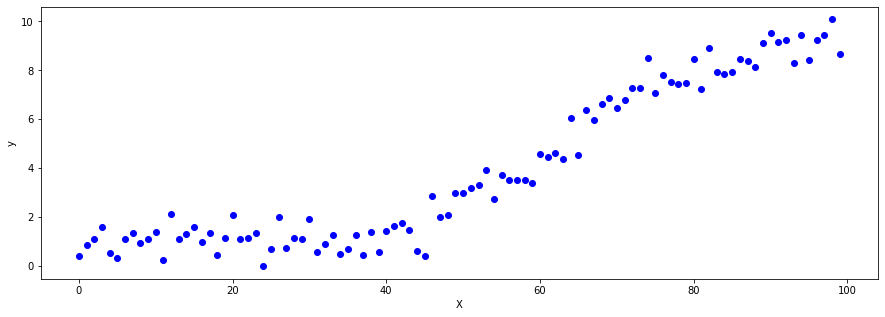

In [204]:
plot_data(y_pr=None)

In [209]:
model = Linear(0.0, 0.0)
linear_regression = LinearRegression(model, lr=0.0001, n_iters=2000000, tl=10000)
y_preds = linear_regression.fit(X, y)

Interation 0 cost = 25.78372416201205
Interation 10000 cost = 6.545239122633622
Interation 20000 cost = 5.508834064585434
Interation 30000 cost = 4.742169176647182
Interation 40000 cost = 4.120363690714443
Interation 50000 cost = 3.6157405051715537
Interation 60000 cost = 3.2062144746556447
Interation 70000 cost = 2.873864359744345
Interation 80000 cost = 2.604146220560113
Interation 90000 cost = 2.3852569488519
Interation 100000 cost = 2.2076177533055286
Interation 110000 cost = 2.0634549830240063
Interation 120000 cost = 1.9464599455756306
Interation 130000 cost = 1.8515128329416866
Interation 140000 cost = 1.7744586741145747
Interation 150000 cost = 1.7119255098314263
Interation 160000 cost = 1.6611768326051057
Interation 170000 cost = 1.6199918346964646
Interation 180000 cost = 1.5865682235711882
Interation 190000 cost = 1.5594433519581745
Interation 200000 cost = 1.537430211090057
Interation 210000 cost = 1.5195654861323449
Interation 220000 cost = 1.5050674006602685
Interation 23

Interation 1860000 cost = 1.4426328919306826
Interation 1870000 cost = 1.4426328919306821
Interation 1880000 cost = 1.442632891930683
Interation 1890000 cost = 1.442632891930683
Interation 1900000 cost = 1.4426328919306826
Interation 1910000 cost = 1.442632891930683
Interation 1920000 cost = 1.4426328919306823
Interation 1930000 cost = 1.4426328919306821
Interation 1940000 cost = 1.4426328919306823
Interation 1950000 cost = 1.4426328919306823
Interation 1960000 cost = 1.442632891930683
Interation 1970000 cost = 1.4426328919306832
Interation 1980000 cost = 1.4426328919306823
Interation 1990000 cost = 1.442632891930683
W=10.913399553681357 b=-2.055988493893648


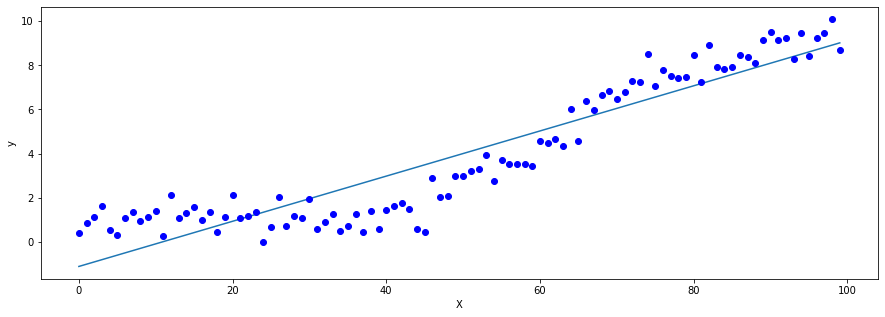

In [210]:
plot_data(y_pr=y_preds)

Don't forget that we use all $X$ not for particular $X^i$

## Types of machine learning

- **Classification** when $f:X \to \{y^1, y^2, \dots y^k\}$ in finity, predefined amount of elements
<br>
For instance classify images of cats and dogs
- **Regression** when $f:X \to Y$ in infinity, undefined amount of elements (interpolation, extrapolation)
<br>
House price prediction

Clasification vs regression:
<img src="images/intro1/regression_class_1.png" height="800" width="800">

#### Question:

- Predicting sentiments
- Predicting prices
- Organize images (family, nature, buildings, space, satellite, graphs)
- Localizing a single object on images

#### Mixed types

Object localization:
<br>
<img src="images/intro2/class_localize_1.png" height="800" width="800">

We have one loss for object classification (classification) and second for bounding box coordinates localization (regression):
<br>
<img src="images/intro2/class_localize_2.png" height="1000" width="1000">

## Approaches

- **Supervised learning** when we have true labels $y = (y^1, y^2, \dots, y^m)$ provided
- **Unsupervised learning** when we don't have any labels
- **Self-supervised learning** when labels are generated from data
- **Semi-supervised learning** when we have labels on limited amount of data

## Unsupervised learning

- **Clustering** pull together similar data in clusters without prior knowladge of labels
- **Dimensionality reduction** mapping $f:X \to Z$ where $X \subset \mathbb{R}^d$ and $Z \subset \mathbb{R}^k$ and $k < d$ or any other linear spaces where $dim(Z) < dim(X)$
- **Annomaly detection** detect out of distribution, out of variance points in data

## Self supervised learning

#### Autoecoders

Auto-encoders learn from the original images, they encode and reconstruct data
<br>
<img src="images/intro2/ae_1.png" height="800" width="800">

#### Denoising auto-encoders

If we add augmentation and make the model extract features from images:
<br>
<img src="images/intro2/dae_1.png" height="800" width="800">

#### Colorization

DeOldify
<img src="images/intro2/pv_10.jpg" height="800" width="800">

## Thank you

## Questions

<img src="images/intro2/questions_2.jpg" height="800" width="800">

## Thank you